In [3]:
from evwTools import *

Welcome to JupyROOT 6.12/06


In [4]:
#f = r.TFile("./data/gm2offline_ana_100files_fullTrees.root")
#f = r.TFile("./data/dataExternal/Oct16DataSet/gm2offline_ana_12396057_16369.00196.root")
#f = r.TFile("./data/gm2offline_ana.root")
#f = r.TFile("./data/gm2offline_ana_13084967_16358.00241.root") #v9_08 energy update
#f = r.TFile("./data/dataExternal/Nov7_v08_EnergyFix/results_full_v9_08_00_Nov7_EnergyFix.root")
#f = r.TFile("./data/gm2offline_ana_v11_Nov14.root")
#f = r.TFile("./data/dataExternal/Nov14_v11_60hr_PartialSet_WrongTimeConstants/results_full_partial_v9_11_Nov14.root")
#f = r.TFile("./data/gm2offline_ana_0_15926.00195.root") # 10 files
f = r.TFile("../data/gm2offline_ana_0_15936.00132.root") # 100 files
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")
tcomp = f.Get("farline").Get("evwTree")
terr = f.Get("farline").Get("evwNoPartnerTree")

tcomp2 = f.Get("farline").Get("wveTree")
terr2 = f.Get("farline").Get("wveNoPartnerTree")

In [5]:
tcomp.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :  4549451 : Total =      1781353508 bytes  File  Size =  642685038 *
*        :          : Tree compression factor =   2.77                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :  4549451 : Total  Size=   18202625 bytes  File Size  =      93959 *
*Baskets :       47 : Basket Size=    2491904 bytes  Compression= 193.72     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :  4549451 : Total  Size=   18202778 bytes  File Size  =      94074 *
*Baskets :       47 : Basket Size=    2491904 bytes  Compression= 193.48     *
*...................................................

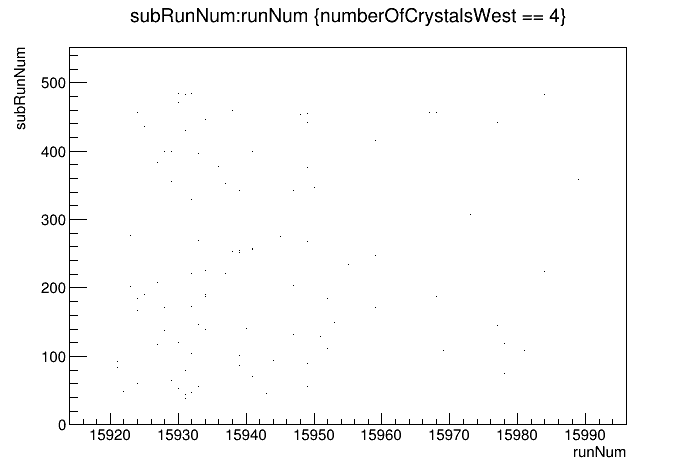

In [8]:
c = r.TCanvas()
tcomp.Draw("subRunNum:runNum","numberOfCrystalsWest == 4","")
c.Draw()

In [7]:
hi = r.TH1D("hi","Energies",400,0,4000)
tcomp.Draw("energyWest>>hi","","goff")

4549451

In [9]:
h2 = r.TH1D("h2","Energies [nhit = 1]; E [MeV]",4000,0,4000)
tcomp.Draw("energyWest>>h2","numberOfCrystalsWest == 4","goff")

1242436

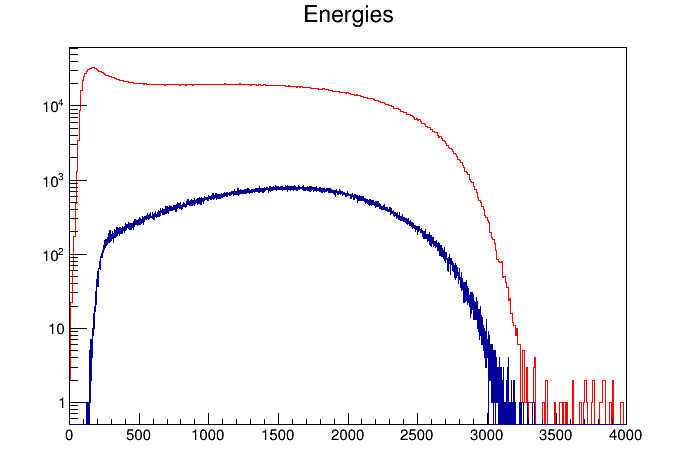

In [10]:
c = r.TCanvas()
hi.SetLineColor(2)
hi.Draw()
h2.Draw("SAME")
c.SetLogy()
c.Draw()

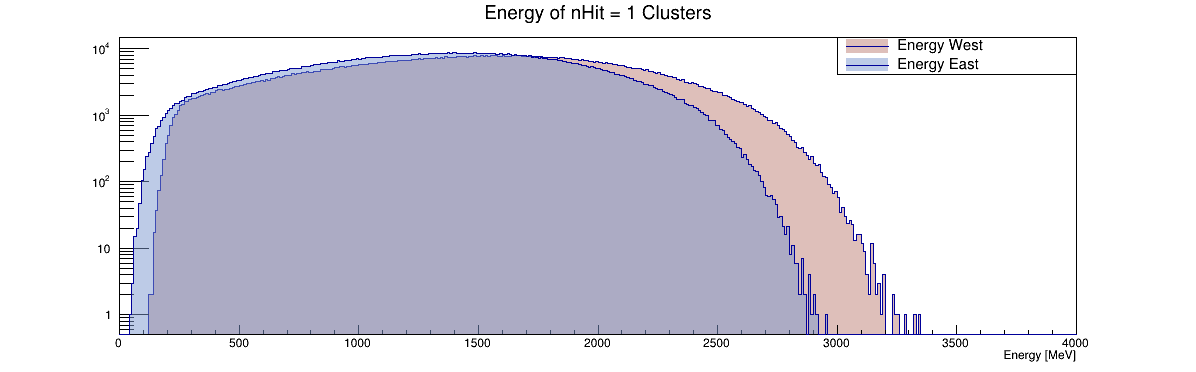

In [11]:
c = r.TCanvas("c","c",1200,400)

hist = r.TH1D("hist","Energy of nHit = 1 Clusters; Energy [MeV]",400,0,4000)
hist2 = r.TH1D("hist2","Energy of n_{Hit} = 1 Clusters; Energy [MeV]",400,0,4000)

tcomp.Draw("energyWest>>hist","numberOfCrystalsWest == 4","goff")
tcomp.Draw("energyEast>>hist2","numberOfCrystalsWest == 4","goff")

hist.SetFillColorAlpha(45,0.5)
hist2.SetFillColorAlpha(38,0.5)

hist.Draw()
hist2.Draw("SAME")

leg = r.TLegend(0.7,0.8,0.9,0.9)
leg.AddEntry(hist ,"Energy West", "fl")
leg.AddEntry(hist2 ,"Energy East", "fl")
leg.Draw()

c.SetLogy()
c.Draw()

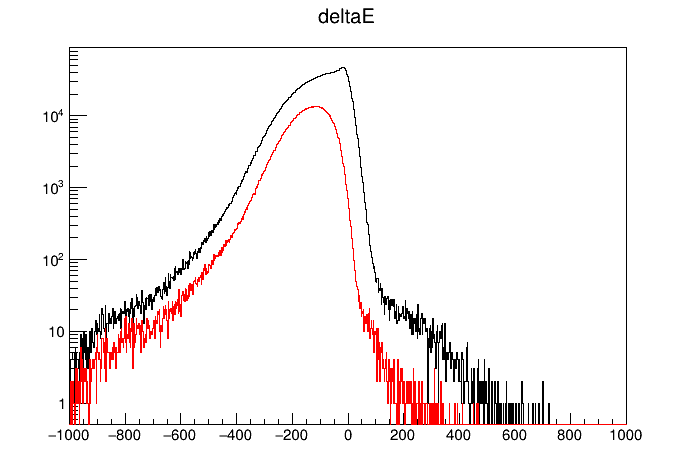

In [12]:
c = r.TCanvas()
tcomp.SetLineColor(1)
tcomp.Draw("deltaE>>h1(1000,-1000,1000)","","")
tcomp.SetLineColor(2)
tcomp.Draw("deltaE>>h2(1000,-1000,1000)","numberOfCrystalsWest == 4","same")
c.SetLogy()
c.Draw()
tcomp.SetLineColor(1)

In [30]:
totalSlopes = [1.0810350908478064, 1.0922848538429402, 1.0749521616897078, 1.0842808081535105, 
               1.133815538351371, 1.10035229953596, 1.0971102023630293, 1.1027146197656987, 1.1015193430995442,
               1.100388232673258, 1.1008871320311406, 1.1050711446050583, 1.1073961236759629, 1.103677350330267,
               1.1148458515934148, 1.1078804766330357, 1.110162736477429, 1.118962607726785, 1.1234146706416626,
               1.122162882069287, 1.1407413684485197, 1.1209902330342003, 1.12267787167775, 1.1112916814411409]

In [20]:
evwVec = []
for i in range(1,16):
    hi = r.TH2D("hi","Energy EvW of Recon West Clusters with n_{hit} = "+str(i)+"; Energy East [MeV; Energy West [MeV]"
                ,6000,0,6000,6000,0,6000)
    tcomp.Draw("energyWest:energyEast>>hi","numberOfCrystalsWest == "+str(i),"goff")
    evwVec.append( hi.Clone("h"+str(i)) )

Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing ex

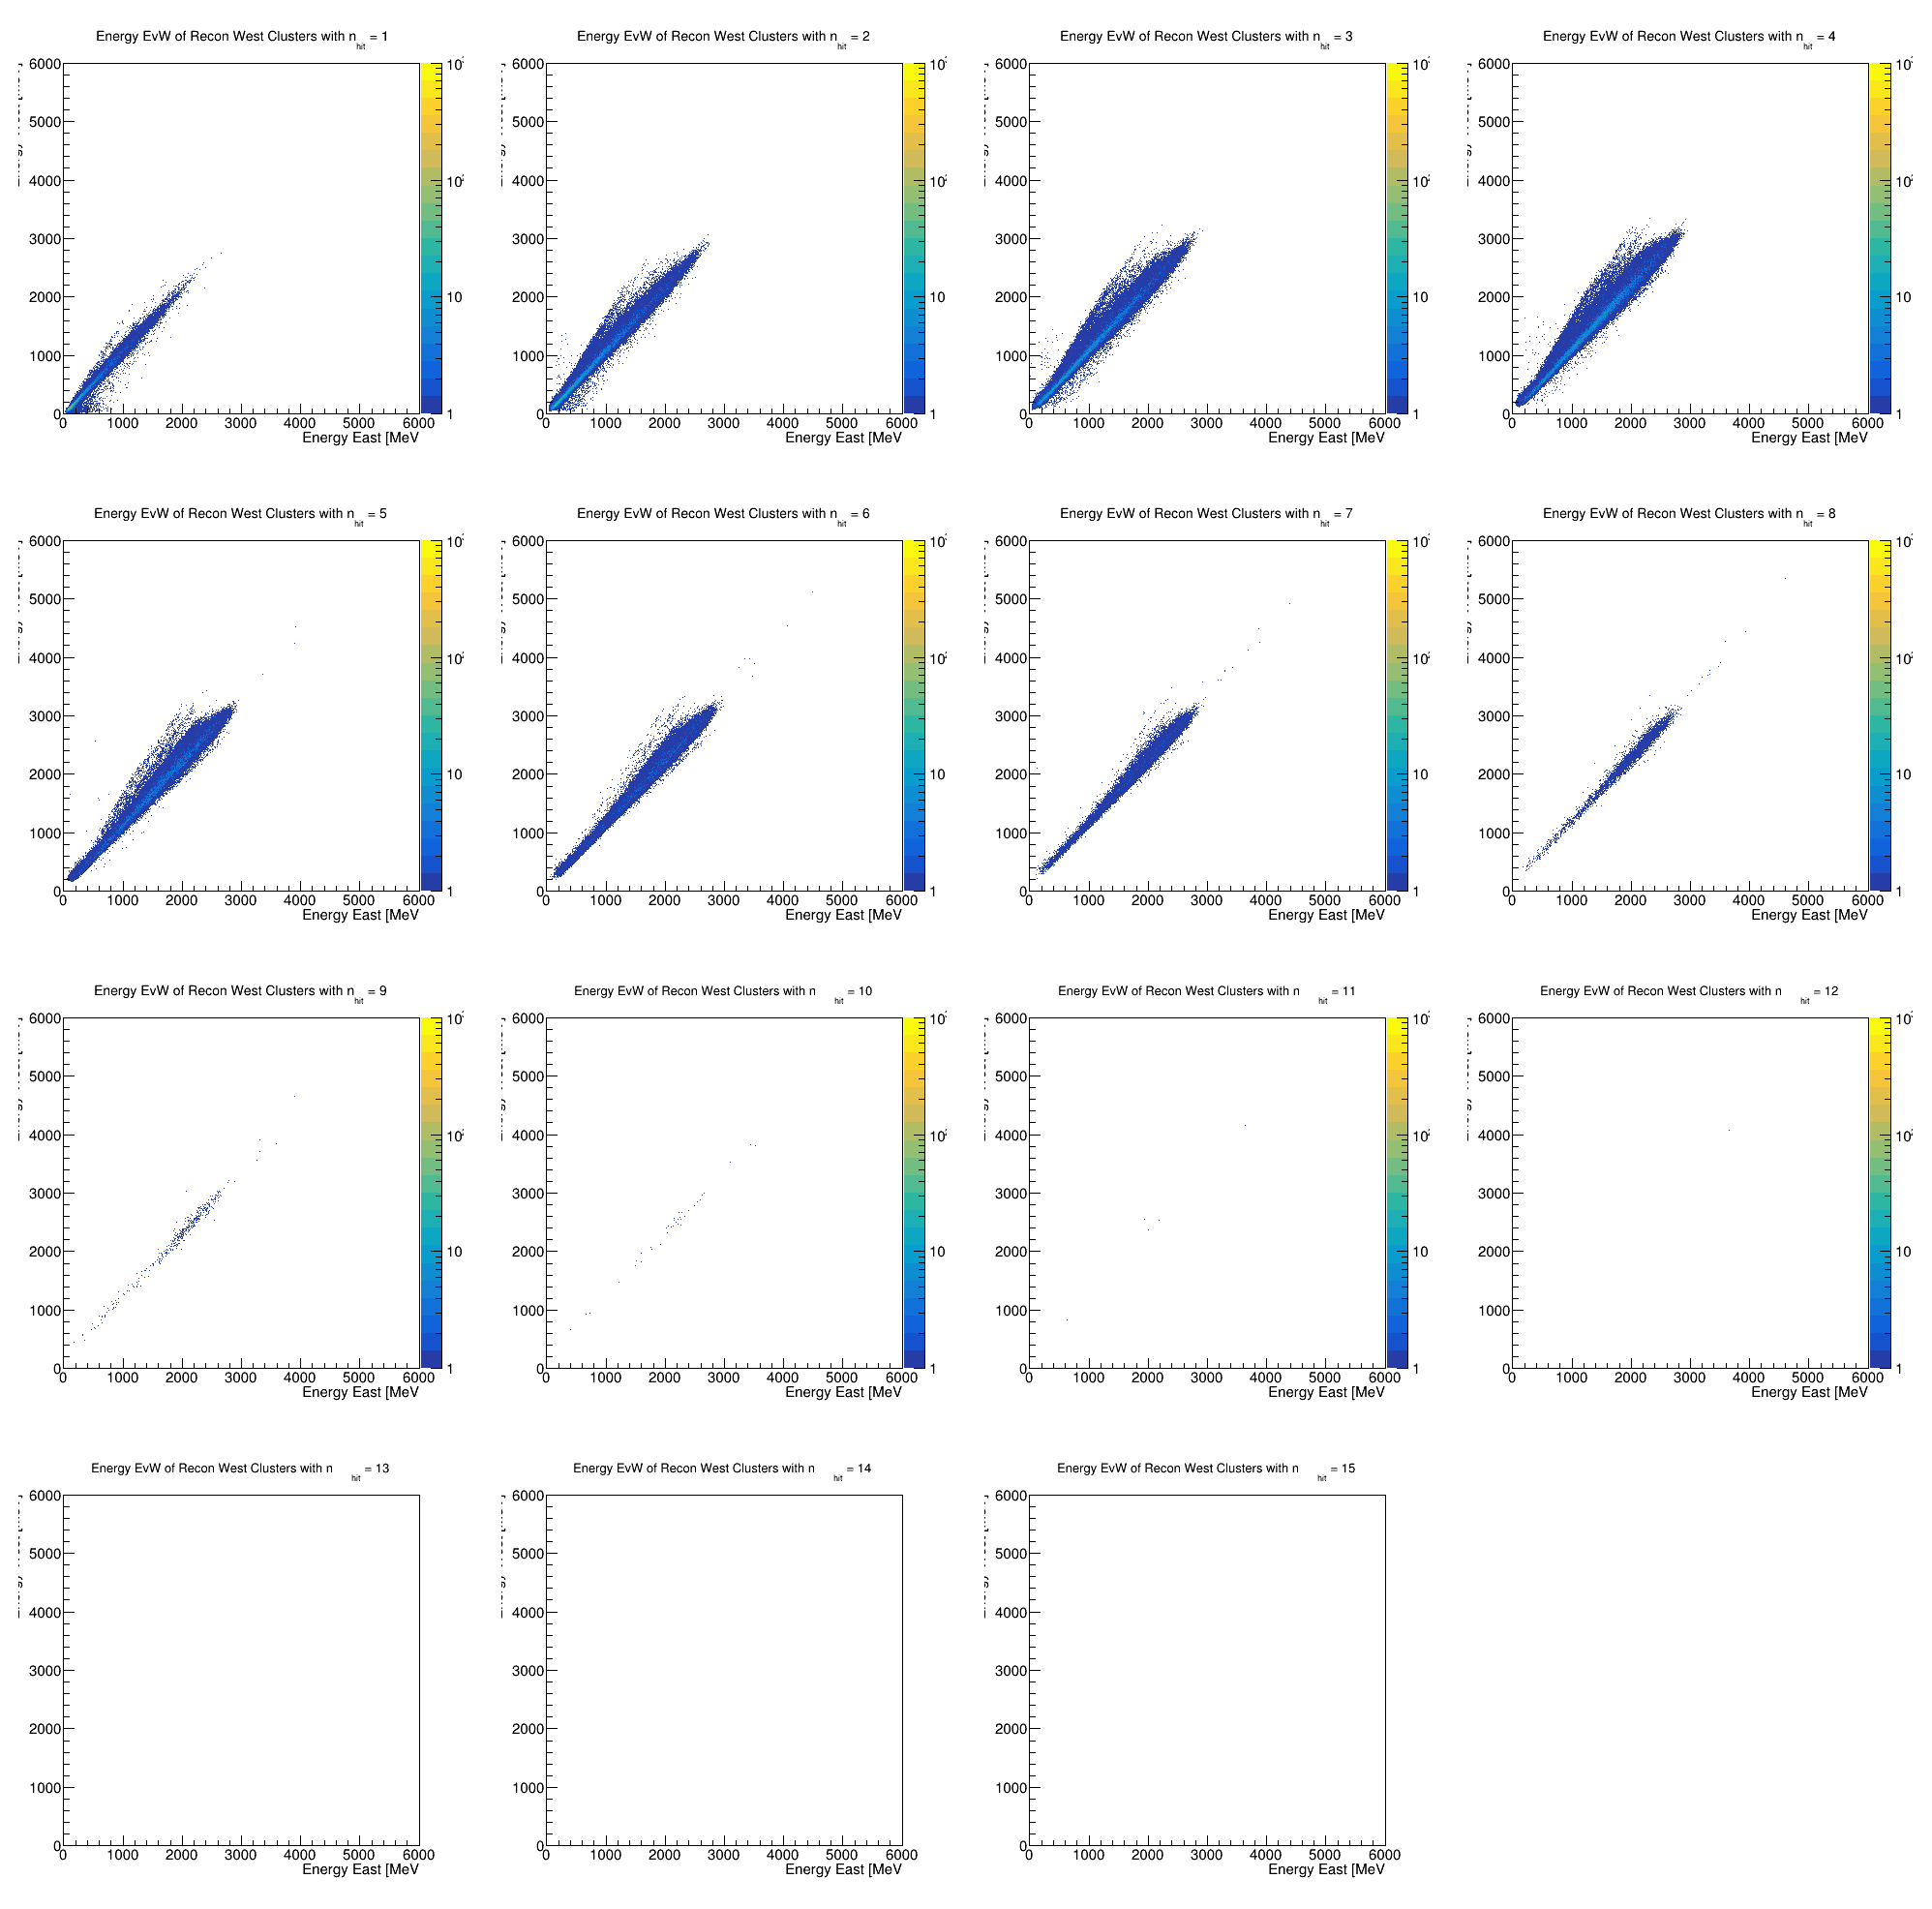

In [21]:
c = r.TCanvas("c","c",2000,2000)

c.Divide(4, int(np.ceil(len(evwVec)/4)))

slopeVec = []

for i, hi in enumerate(evwVec):
    c.cd(i+1)
    hi.SetLineColor(1)
    hi.SetFillColorAlpha(i+3,0.15)
    hi.GetZaxis().SetRangeUser(1,1000)
    hi.Draw("colz")
    r.gPad.SetLogz()
c.Draw()

In [ ]:
for calo in range(1,25):
    for i in range(1,16):
    hi = r.TH2D("hi","Energy EvW of Recon West Clusters with n_{hit} = "+str(i)+"; Energy East [MeV; Energy West [MeV]"
                ,6000,0,6000,6000,0,6000)
    tcomp.Draw("energyWest:energyEast>>hi","numberOfCrystalsWest == "+str(i),"goff")
    evwVec.append( hi.Clone("h"+str(i)) )

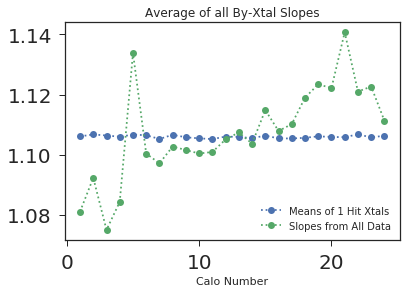

In [31]:
plt.plot([x for x in range(1,25)],[np.average(calo,weights=entriesByCalo[i]) for i, calo in enumerate(slopesByCaloNoZeros)]
         ,"o:", label='Means of 1 Hit Xtals')
plt.plot([x for x in range(1,25)],totalSlopes,"o:", label='Slopes from All Data')
plt.title("Average of all By-Xtal Slopes")
plt.xlabel("Calo Number")
plt.legend()
plt.show()